In [55]:
import os
from dotenv import load_dotenv

In [50]:
from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [9]:
load_dotenv()
Gemini_api_key = os.environ.get("GEMINI_API_KEY")

In [13]:
import google.generativeai as genai
genai.configure(api_key=Gemini_api_key)

In [14]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924


In [20]:
model=genai.GenerativeModel("models/gemini-1.5-flash")


In [51]:
import pathlib
def captioning(
    path: str,
    prompt: str = "tell me the number of people in this image and is the any space or room for more if yes then how much and if not then is it possible to eiher stand and travel "
    ):
    picture = {
        "mime_type": "image/png",
        "data": pathlib.Path(path).read_bytes()
    }
    response = model.generate_content(contents=[prompt,picture])
    return to_markdown(response.text)

> There are at least 20 people in this image. There is very limited space. It is not possible to stand or travel in this train car.

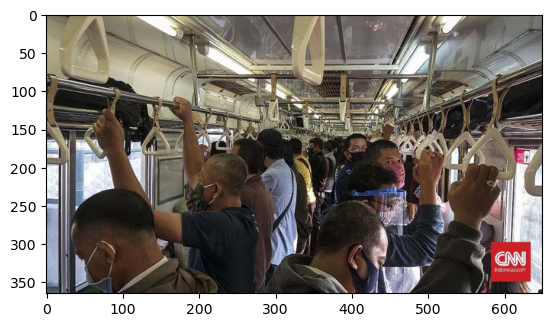

In [52]:
import matplotlib.pyplot as plt
x = plt.imread("./test_img/indonesianbus.jpeg")
plt.imshow(x)
captioning(path="./test_img/indonesianbus.jpeg")

> It is very hard to count the exact number of people in the image due to the density of the crowd and the obstruction of some individuals by others. However, it appears to be a very crowded train car.  
> 
> There is clearly no space for more people to fit into the car. It is not possible for people to stand or travel freely with that density.  The passengers are squeezed together and unable to move much, with some holding onto handles for support. 


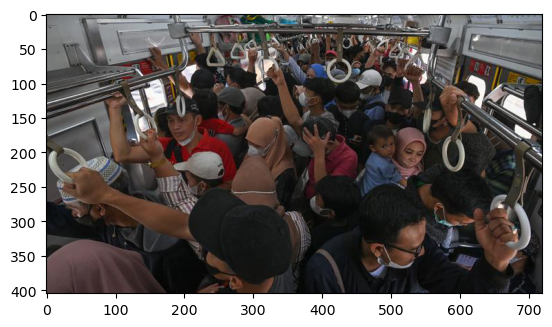

In [54]:
x = plt.imread("./test_img/turkish.jpg")
plt.imshow(x)
captioning("./test_img/turkish.jpg",)